In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from micrograd.variable import Value
from micrograd.nn import Neuron, Layer, MLP
%matplotlib inline

In [3]:
np.random.seed(43)
random.seed(43)

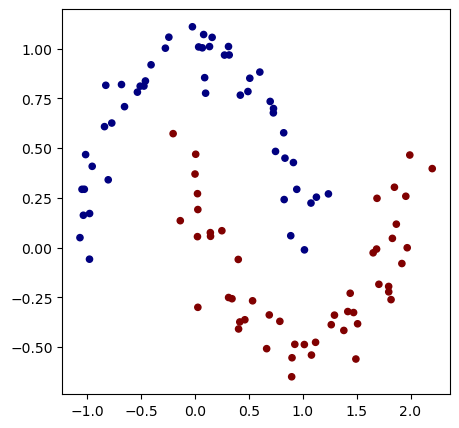

In [5]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [10]:
# initialize a model 
model = MLP(2, [32, 32, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activation tanh, Neuron(2) with activat

In [11]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.5371014009034978, label=, grad=0.0) 0.23


In [12]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 10 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.5371014009034978, accuracy 23.0%
step 1 loss 1.2128028499996182, accuracy 39.0%
step 2 loss 1.0154899104052026, accuracy 48.0%
step 3 loss 0.4660573381971861, accuracy 79.0%
step 4 loss 0.4274248042646891, accuracy 80.0%
step 5 loss 0.39531161264931114, accuracy 82.0%
step 6 loss 0.3633084043797762, accuracy 84.0%
step 7 loss 0.3267124704759607, accuracy 86.0%
step 8 loss 0.2963061988768634, accuracy 87.0%
step 9 loss 0.24790455342921044, accuracy 90.0%
step 10 loss 0.28178381801997715, accuracy 90.0%
step 11 loss 0.299203738095163, accuracy 86.0%
step 12 loss 0.2636026053735795, accuracy 88.0%
step 13 loss 0.22629880560610333, accuracy 90.0%
step 14 loss 0.16447901116355124, accuracy 95.0%
step 15 loss 0.18242629040437142, accuracy 93.0%
step 16 loss 0.22359389544171066, accuracy 91.0%
step 17 loss 0.1813686027337027, accuracy 93.0%
step 18 loss 0.11976884961614928, accuracy 97.0%
step 19 loss 0.11556432978776562, accuracy 97.0%


KeyboardInterrupt: 

(-1.6492016868882176, 2.1007983131117824)

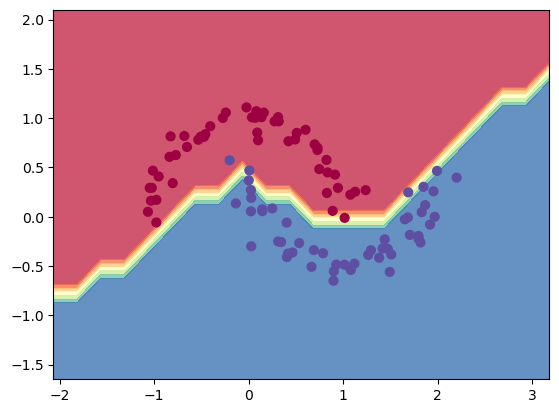

In [13]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())